In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('pancancerinfo.csv')

In [3]:
df.head()

,bcr_patient_barcode,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,vital_status,treatment_outcome_first_course,Event,Delay
0,TCGA_CF_A9FH,BLCA,85.0,MALE,ASIAN,Stage II,Alive,Complete Remission/Response,0.0,0.0
1,TCGA_A8_A06N,BRCA,66.0,FEMALE,[Not Available],Stage IIIB,Alive,[Not Available],0.0,0.0
2,TCGA_A8_A081,BRCA,80.0,FEMALE,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0
3,TCGA_A8_A083,BRCA,67.0,FEMALE,[Not Available],Stage IIB,Alive,[Not Available],0.0,0.0
4,TCGA_A8_A08H,BRCA,66.0,FEMALE,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0


In [4]:
df['ajcc_pathologic_tumor_stage'].unique()

array(['Stage II', 'Stage IIIB', 'Stage IIA', 'Stage IIB', 'Stage IIIC',
       'Stage IIIA', '[Not Available]', 'Stage IV', 'Stage III',
       'Stage I', '[Not Applicable]', 'Stage IB', 'Stage IA', 'Stage IIC',
       'Stage IVA', '[Unknown]', 'Stage X', '[Discrepancy]', 'Stage IVB',
       'Stage IVC', 'IS', 'I/II NOS', 'Stage 0'], dtype=object)

In [5]:
df.info

<bound method DataFrame.info of       bcr_patient_barcode  type  age_at_initial_pathologic_diagnosis  gender  \
0            TCGA_CF_A9FH  BLCA                                 85.0    MALE   
1            TCGA_A8_A06N  BRCA                                 66.0  FEMALE   
2            TCGA_A8_A081  BRCA                                 80.0  FEMALE   
3            TCGA_A8_A083  BRCA                                 67.0  FEMALE   
4            TCGA_A8_A08H  BRCA                                 66.0  FEMALE   
...                   ...   ...                                  ...     ...   
11155        TCGA_D3_A8GR  SKCM                                 54.0  FEMALE   
11156        TCGA_EE_A183  SKCM                                 48.0    MALE   
11157        TCGA_EE_A20C  SKCM                                 59.0    MALE   
11158        TCGA_EE_A29W  SKCM                                 42.0    MALE   
11159        TCGA_ER_A2NE  SKCM                                 39.0    MALE   

       

In [6]:
df.describe()

,age_at_initial_pathologic_diagnosis,Event,Delay
count,11109.000000,11151.000000,11094.000000
mean,59.099019,0.324814,1038.605553
std,14.415440,0.468326,1038.663449
min,10.000000,0.000000,0.000000
25%,50.000000,0.000000,381.000000
50%,60.000000,0.000000,714.000000
75%,70.000000,1.000000,1369.000000
max,90.000000,1.000000,11252.000000


## Handling  Missing Values

In [7]:
df.isnull().sum()

bcr_patient_barcode                     0
type                                    0
age_at_initial_pathologic_diagnosis    51
gender                                  0
race                                    0
ajcc_pathologic_tumor_stage             0
vital_status                            4
treatment_outcome_first_course         51
Event                                   9
Delay                                  66
dtype: int64

In [8]:
df['race'].value_counts()

WHITE                                        8186
[Not Available]                              1038
BLACK OR AFRICAN AMERICAN                     934
ASIAN                                         675
[Not Evaluated]                               155
[Unknown]                                     132
AMERICAN INDIAN OR ALASKA NATIVE               27
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER      13
Name: race, dtype: int64

In [9]:
df['ajcc_pathologic_tumor_stage'].value_counts()

[Not Available]     2280
[Not Applicable]    1864
Stage I             1286
Stage IIA            804
Stage III            709
Stage IIB            702
Stage II             642
Stage IIIA           507
Stage IV             479
Stage IB             401
Stage IA             383
Stage IVA            336
Stage IIIB           286
Stage IIIC           248
Stage IIC             67
[Discrepancy]         53
IS                    46
Stage IVB             21
I/II NOS              14
Stage X               13
Stage IVC              7
Stage 0                7
[Unknown]              5
Name: ajcc_pathologic_tumor_stage, dtype: int64

In [10]:
df['treatment_outcome_first_course'].value_counts()

[Not Available]                                            5140
Complete Remission/Response                                4093
Progressive Disease                                         672
Stable Disease                                              376
[Unknown]                                                   353
Partial Remission/Response                                  292
[Not Applicable]                                            105
No Measureable Tumor or Tumor Markers                        36
[Discrepancy]                                                29
Persistent Disease                                            6
[Not Evaluated]                                               4
Normalization of Tumor Markers, but Residual Tumor Mass       3
Name: treatment_outcome_first_course, dtype: int64

In [11]:
df['Event'].value_counts()

0.0    7529
1.0    3622
Name: Event, dtype: int64

In [12]:
df.columns

Index(['bcr_patient_barcode', 'type', 'age_at_initial_pathologic_diagnosis',
       'gender', 'race', 'ajcc_pathologic_tumor_stage', 'vital_status',
       'treatment_outcome_first_course', 'Event', 'Delay'],
      dtype='object')

In [13]:
print(df['age_at_initial_pathologic_diagnosis'].isna().sum())
print(df['vital_status'].isna().sum())
print(df['treatment_outcome_first_course'].isna().sum())
print(df['Event'].isna().sum())
print(df['Delay'].isna().sum())

51
4
51
9
66


In [14]:
df.isna().sum().sum()

181

### Converting all missing values into pd.NA:
   Since this data set has many values that are missing in the form of [Not Available]','[Not Applicable]','[Unknown]','[Not Evaluated] so we have to convert these in the same type of NA (pandas) value

In [15]:
#replacing all unwanted missing information into pd.NA 
#inplace=True means it  replace will happen in original dataset
df.replace(['[Not Available]','[Not Applicable]','[Unknown]','[Not Evaluated]','[Discrepancy]'],pd.NA,inplace=True)

In [16]:
df['treatment_outcome_first_course'].value_counts()

Complete Remission/Response                                4093
Progressive Disease                                         672
Stable Disease                                              376
Partial Remission/Response                                  292
No Measureable Tumor or Tumor Markers                        36
Persistent Disease                                            6
Normalization of Tumor Markers, but Residual Tumor Mass       3
Name: treatment_outcome_first_course, dtype: int64

In [17]:
print(f"Null value at age_at_initial_pathologic_diagnosis column:{df['age_at_initial_pathologic_diagnosis'].isna().sum()}")
print(f"Null value at vital_status Column:{df['vital_status'].isna().sum()}")
print(f"Null value at race column:{df['race'].isna().sum()}")
print(f"Null value at ajcc_pathologic_tumor_stage column:{df['ajcc_pathologic_tumor_stage'].isna().sum()}")
print(f"Null value at treatment_outcome_first_course column:{df['treatment_outcome_first_course'].isna().sum()}")
print(f"Null value at Event column:{df['Event'].isna().sum()}")
print(f"Null value at Delay column:{df['Delay'].isna().sum()}")

Null value at age_at_initial_pathologic_diagnosis column:51
Null value at vital_status Column:5
Null value at race column:1325
Null value at ajcc_pathologic_tumor_stage column:4202
Null value at treatment_outcome_first_course column:5682
Null value at Event column:9
Null value at Delay column:66


In [18]:
df.isna().sum().sum()

11340

##### Since treatement column has 5653 missing values so I decide to drop it 

In [19]:
df.drop('treatment_outcome_first_course',axis=1,inplace=True)

In [20]:
df.shape

(11160, 9)

##### Missing value in the column Race is dealing with forward fill method

In [21]:
#since missing values of column Race are existed in between not null and same repeated 
#values so forwardfill method is best for treating null value
column=['race']
df.loc[:,column]=df.loc[:,column].ffill()

In [22]:
df.isna().sum().sum()

4333

In [23]:
df.isnull().sum()

bcr_patient_barcode                       0
type                                      0
age_at_initial_pathologic_diagnosis      51
gender                                    0
race                                      0
ajcc_pathologic_tumor_stage            4202
vital_status                              5
Event                                     9
Delay                                    66
dtype: int64

#### Since very few missing values are in the column status so we can deal with forward filling

In [24]:
sdf=['vital_status']
df.loc[:,sdf]=df.loc[:,sdf].ffill()

In [25]:
df['vital_status'].isnull().sum()

0

### Getting mean age  with different race

race
AMERICAN INDIAN OR ALASKA NATIVE             52.482759
ASIAN                                        56.547097
BLACK OR AFRICAN AMERICAN                    58.549282
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER    56.312500
WHITE                                        59.400692
Name: age_at_initial_pathologic_diagnosis, dtype: float64AxesSubplot(0.125,0.11;0.775x0.77)


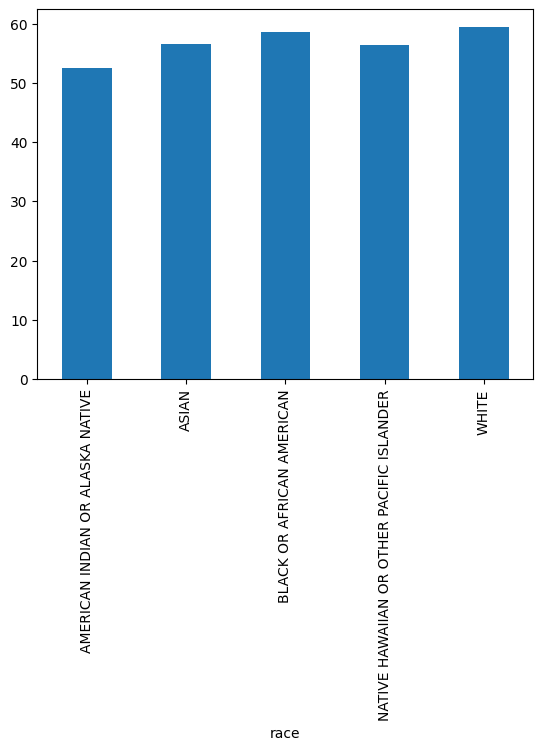

In [26]:
print(f"{df.groupby(['race'])['age_at_initial_pathologic_diagnosis'].mean()}{df.groupby(['race'])['age_at_initial_pathologic_diagnosis'].mean().plot.bar()}")

In [27]:
#replacing null value with mean with different race
column=['age_at_initial_pathologic_diagnosis']
race_index_c=df[(df['age_at_initial_pathologic_diagnosis'].isnull())].index
american_indian_age_mean=df[df['race']=='AMERICAN INDIAN OR ALASKA NATIVE'].mean(skipna=True,numeric_only=True).age_at_initial_pathologic_diagnosis
asian_age_mean=df[df['race']=='ASIAN'].mean(skipna=True,numeric_only=True).age_at_initial_pathologic_diagnosis
black_age_mean=df[df['race']=='BLACK OR AFRICAN AMERICAN'].mean(skipna=True,numeric_only=True).age_at_initial_pathologic_diagnosis
hawaiian_age_mean=df[df['race']=='NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER'].mean(skipna=True,numeric_only=True).age_at_initial_pathologic_diagnosis
white_age_mean=df[df['race']=='WHITE'].mean(skipna=True,numeric_only=True).age_at_initial_pathologic_diagnosis
for i in race_index_c:
    if df['race'][i]=='AMERICAN INDIAN OR ALASKA NATIVE':
        df.at[i,column]=american_indian_age_mean
    if df['race'][i]=='ASIAN':
        df.at[i,column]=asian_age_mean
    if df['race'][i]=='BLACK OR AFRICAN AMERICAN':
        df.at[i,column]=black_age_mean
    if df['race'][i]=='NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER':
        df.at[i,column]=hawaiian_age_mean
    if df['race'][i]=='WHITE':
        df.at[i,column]=white_age_mean
        

In [28]:
df.isnull().sum()

bcr_patient_barcode                       0
type                                      0
age_at_initial_pathologic_diagnosis       0
gender                                    0
race                                      0
ajcc_pathologic_tumor_stage            4202
vital_status                              0
Event                                     9
Delay                                    66
dtype: int64

### Dropping Event column

In [29]:
#Event column is a duplicate column of vital_status so it would be better to drop the entire column
df.drop('Event',axis=1,inplace=True)

In [30]:
#column bcr_patient_barcode has no use in this analysis so it would be better to drop the column
df.drop('bcr_patient_barcode',axis=1,inplace=True)

In [31]:
#column 'Delay' has significant role in this analysis but also contain some missing value 
#so initially I have decided it to drop and treating missing value of tumor_stage column then again we will add Delay
df1=df.drop('Delay',axis=1)

In [32]:
df1.isnull().sum()

type                                      0
age_at_initial_pathologic_diagnosis       0
gender                                    0
race                                      0
ajcc_pathologic_tumor_stage            4202
vital_status                              0
dtype: int64

### Column Stage

Stage I       1286
Stage IIA      804
Stage III      709
Stage IIB      702
Stage II       642
Stage IIIA     507
Stage IV       479
Stage IB       401
Stage IA       383
Stage IVA      336
Stage IIIB     286
Stage IIIC     248
Stage IIC       67
IS              46
Stage IVB       21
I/II NOS        14
Stage X         13
Stage IVC        7
Stage 0          7
Name: ajcc_pathologic_tumor_stage, dtype: int64,
Mode is:0    Stage I
dtype: object,
AxesSubplot(0.125,0.11;0.775x0.77)


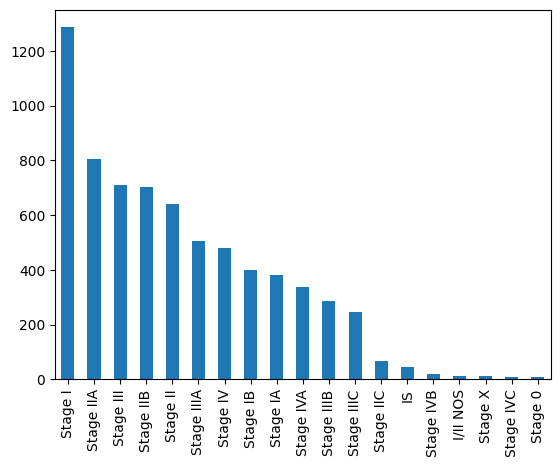

In [33]:
print(f"{df1['ajcc_pathologic_tumor_stage'].value_counts()},\nMode is:{df1['ajcc_pathologic_tumor_stage'].mode()},\n{df1['ajcc_pathologic_tumor_stage'].value_counts().plot.bar()}")

### Dealing  missing value  of column stage
Column tumar_stage contains 4202 missing value which is very large so it would be better to make a predicting model.
For that I am using linear regression model and taking column stage as dependant column. Now splitting the dataset into two parts where test data will contain those rows of missing value and train data will contain rows of not null value.
df_test==> X_test(all dependant columns)+y_test(this will be the final predicted value ,predction is based on Xtest)
df_train==>X_train(all dependent column for model training)+y_train(all not null value of column tumor_stage)
first model will be fitted with X_train and y_train then prediction is done with X_test after that concatinating y_test with X_test and finally concatinating df_test and df_train we will get df_final dataset.

In [34]:
## Test Data -- Null value in "stage"
df_test = df1[df1["ajcc_pathologic_tumor_stage"].isnull()]
df_test

,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,vital_status
14,CESC,65.0,FEMALE,WHITE,<NA>,Alive
15,CESC,63.0,FEMALE,ASIAN,<NA>,Alive
16,CESC,73.0,FEMALE,ASIAN,<NA>,Alive
17,CESC,58.0,FEMALE,ASIAN,<NA>,Alive
18,CESC,42.0,FEMALE,WHITE,<NA>,Alive
...,...,...,...,...,...,...
11134,LAML,54.0,MALE,BLACK OR AFRICAN AMERICAN,<NA>,Dead
11135,LAML,25.0,FEMALE,WHITE,<NA>,Dead
11145,OV,59.0,FEMALE,WHITE,<NA>,Dead
11151,OV,80.0,FEMALE,ASIAN,<NA>,Dead


In [35]:
df_test.shape

(4202, 6)

In [36]:
X_test=df_test.drop('ajcc_pathologic_tumor_stage',axis=1)
X_test.head()

,type,age_at_initial_pathologic_diagnosis,gender,race,vital_status
14,CESC,65.0,FEMALE,WHITE,Alive
15,CESC,63.0,FEMALE,ASIAN,Alive
16,CESC,73.0,FEMALE,ASIAN,Alive
17,CESC,58.0,FEMALE,ASIAN,Alive
18,CESC,42.0,FEMALE,WHITE,Alive


In [37]:
#converting all categorical value into numerical value using label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in X_test.columns:
        X_test[col] = le.fit_transform(X_test[col])

In [38]:
X_test.head()

,type,age_at_initial_pathologic_diagnosis,gender,race,vital_status
14,3,51,0,4,0
15,3,49,0,1,0
16,3,59,0,1,0
17,3,43,0,1,0
18,3,27,0,4,0


In [39]:
## Train Dataset ("stage") column without null
df_train = df1.dropna()

In [40]:
df_train.shape

(6958, 6)

In [41]:
df_train

,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,vital_status
0,BLCA,85.0,MALE,ASIAN,Stage II,Alive
1,BRCA,66.0,FEMALE,ASIAN,Stage IIIB,Alive
2,BRCA,80.0,FEMALE,ASIAN,Stage IIA,Alive
3,BRCA,67.0,FEMALE,ASIAN,Stage IIB,Alive
4,BRCA,66.0,FEMALE,ASIAN,Stage IIA,Alive
...,...,...,...,...,...,...
11155,SKCM,54.0,FEMALE,WHITE,Stage 0,Dead
11156,SKCM,48.0,MALE,WHITE,Stage 0,Dead
11157,SKCM,59.0,MALE,WHITE,Stage 0,Dead
11158,SKCM,42.0,MALE,WHITE,Stage 0,Alive


In [42]:
df_train['type'].value_counts()

BRCA    1086
KIRC     534
LUAD     514
THCA     505
LUSC     500
HNSC     453
COAD     448
SKCM     432
STAD     416
BLCA     410
LIHC     353
KIRP     261
PAAD     182
ESCA     162
READ     161
TGCT     127
KICH     113
ACC       90
MESO      87
UVM       79
CHOL      45
Name: type, dtype: int64

In [43]:
#converting train data into numerical value
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in df_train.columns:
        df_train[col] = le.fit_transform(df_train[col])

C:\Users\awahi\AppData\Local\Temp\ipykernel_18188\1340721725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = le.fit_transform(df_train[col])


In [44]:
df_train

,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,vital_status
0,1,74,1,1,6,0
1,2,55,0,1,12,0
2,2,69,0,1,7,0
3,2,56,0,1,8,0
4,2,55,0,1,7,0
...,...,...,...,...,...,...
11155,16,40,0,4,2,1
11156,16,34,1,4,2,1
11157,16,47,1,4,2,1
11158,16,28,1,4,2,0


In [45]:
df_train['type'].value_counts()

2     1086
8      534
11     514
19     505
12     500
6      453
4      448
16     432
17     416
1      410
10     353
9      261
14     182
5      162
15     161
18     127
7      113
0       90
13      87
20      79
3       45
Name: type, dtype: int64

In [46]:
X_train = df_train.drop("ajcc_pathologic_tumor_stage",axis=1) 
X_train.head()

,type,age_at_initial_pathologic_diagnosis,gender,race,vital_status
0,1,74,1,1,0
1,2,55,0,1,0
2,2,69,0,1,0
3,2,56,0,1,0
4,2,55,0,1,0


In [47]:
X_train.shape

(6958, 5)

In [48]:
y_train = df_train["ajcc_pathologic_tumor_stage"] # Label
y_train.head()

0     6
1    12
2     7
3     8
4     7
Name: ajcc_pathologic_tumor_stage, dtype: int32

In [49]:
## We will use Linear Regression ML model to predict the null value
from sklearn.linear_model import LinearRegression

In [50]:
## Fit the model
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)

LinearRegression()

In [51]:
## Lets Predict the y_test, It means "tumor_stage" values corresponding to those rows where "tumor_stage" has null values.
y_pred = LR_model.predict(X_test)

In [52]:
print(y_pred.shape)
print(type(y_pred))

(4202,)
<class 'numpy.ndarray'>


In [53]:
X_test

,type,age_at_initial_pathologic_diagnosis,gender,race,vital_status
14,3,51,0,4,0
15,3,49,0,1,0
16,3,59,0,1,0
17,3,43,0,1,0
18,3,27,0,4,0
...,...,...,...,...,...
11134,11,39,1,2,1
11135,11,10,0,4,1
11145,16,44,0,4,1
11151,16,66,0,1,1


In [54]:
y_pred

array([7.78012833, 7.34056443, 7.47585865, ..., 8.59139286, 8.47653509,
       8.12477012])

In [55]:
X_test["ajcc_pathologic_tumor_stage"] = y_pred

In [56]:
X_test

,type,age_at_initial_pathologic_diagnosis,gender,race,vital_status,ajcc_pathologic_tumor_stage
14,3,51,0,4,0,7.780128
15,3,49,0,1,0,7.340564
16,3,59,0,1,0,7.475859
17,3,43,0,1,0,7.259388
18,3,27,0,4,0,7.455422
...,...,...,...,...,...,...
11134,11,39,1,2,1,8.929781
11135,11,10,0,4,1,8.552509
11145,16,44,0,4,1,8.591393
11151,16,66,0,1,1,8.476535


In [57]:
df2 = pd.concat([df_train,X_test])

In [58]:
df2.shape

(11160, 6)

In [59]:
df2

,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,vital_status
0,1,74,1,1,6.000000,0
1,2,55,0,1,12.000000,0
2,2,69,0,1,7.000000,0
3,2,56,0,1,8.000000,0
4,2,55,0,1,7.000000,0
...,...,...,...,...,...,...
11134,11,39,1,2,8.929781,1
11135,11,10,0,4,8.552509,1
11145,16,44,0,4,8.591393,1
11151,16,66,0,1,8.476535,1


In [60]:
df2.sort_index(inplace=True)

In [61]:
df2

,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,vital_status
0,1,74,1,1,6.0,0
1,2,55,0,1,12.0,0
2,2,69,0,1,7.0,0
3,2,56,0,1,8.0,0
4,2,55,0,1,7.0,0
...,...,...,...,...,...,...
11155,16,40,0,4,2.0,1
11156,16,34,1,4,2.0,1
11157,16,47,1,4,2.0,1
11158,16,28,1,4,2.0,0


In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11160 entries, 0 to 11159
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   type                                 11160 non-null  int32  
 1   age_at_initial_pathologic_diagnosis  11160 non-null  int64  
 2   gender                               11160 non-null  int32  
 3   race                                 11160 non-null  int32  
 4   ajcc_pathologic_tumor_stage          11160 non-null  float64
 5   vital_status                         11160 non-null  int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 435.9 KB


In [63]:
df2.ajcc_pathologic_tumor_stage=np.int64(df2.ajcc_pathologic_tumor_stage)

In [64]:
df2

,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,vital_status
0,1,74,1,1,6,0
1,2,55,0,1,12,0
2,2,69,0,1,7,0
3,2,56,0,1,8,0
4,2,55,0,1,7,0
...,...,...,...,...,...,...
11155,16,40,0,4,2,1
11156,16,34,1,4,2,1
11157,16,47,1,4,2,1
11158,16,28,1,4,2,0


In [65]:
#column Delay is added again and will treat missing values d by dropping rows 
df2['Delay']=df['Delay']

In [66]:
df2.head()

,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,vital_status,Delay
0,1,74,1,1,6,0,0.0
1,2,55,0,1,12,0,0.0
2,2,69,0,1,7,0,0.0
3,2,56,0,1,8,0,0.0
4,2,55,0,1,7,0,0.0


In [67]:
df2.isnull().sum()

type                                    0
age_at_initial_pathologic_diagnosis     0
gender                                  0
race                                    0
ajcc_pathologic_tumor_stage             0
vital_status                            0
Delay                                  66
dtype: int64

In [68]:
# now making final cleaned dataset by elemenating all missing values
df_final=df2.dropna()

In [69]:
df_final.isnull().sum()

type                                   0
age_at_initial_pathologic_diagnosis    0
gender                                 0
race                                   0
ajcc_pathologic_tumor_stage            0
vital_status                           0
Delay                                  0
dtype: int64

In [70]:
df_final

,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,vital_status,Delay
0,1,74,1,1,6,0,0.0
1,2,55,0,1,12,0,0.0
2,2,69,0,1,7,0,0.0
3,2,56,0,1,8,0,0.0
4,2,55,0,1,7,0,0.0
...,...,...,...,...,...,...,...
11089,18,5,1,4,6,0,9634.0
11090,16,45,0,4,8,1,10346.0
11091,16,37,1,4,0,1,10870.0
11092,22,9,0,4,5,0,11217.0


## Survival Analysis

In [71]:
#!pip install  Lifelines

In [72]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
%matplotlib inline

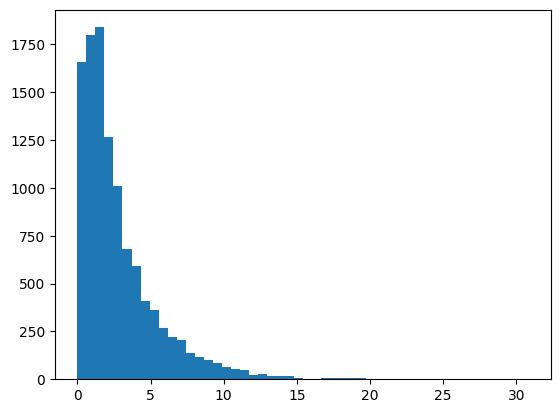

In [73]:
#survival probability with time distribution
# time is represented in year so 
Days=df_final['Delay']
year=Days/365 # Delay column contains information of number of days after diagnosis so I replaced days into year 
event=df_final['vital_status'] # vital_status contains event dead =1 and event alive=0
plt.hist(year,bins=50)
plt.show()

## fitting a non perametric model[Kaplen Mier Curve]

Text(0, 0.5, 'Survival probability')

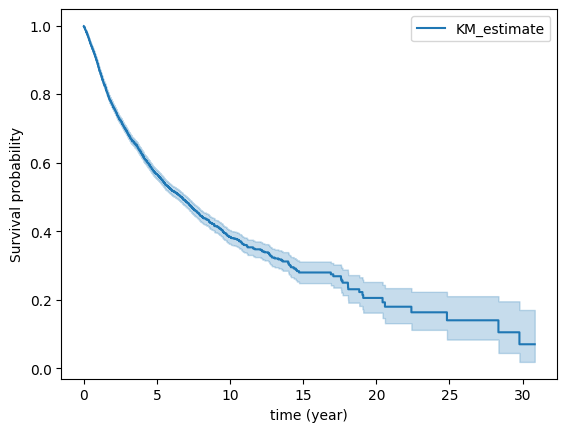

In [74]:
#survival probability using entire dataset with time
kmf=KaplanMeierFitter()
kmf.fit(durations=year,event_observed=event)
kmf.plot_survival_function()
plt.xlabel("time (year)")
plt.ylabel("Survival probability")

Text(0.5, 1.0, 'Survival Function')

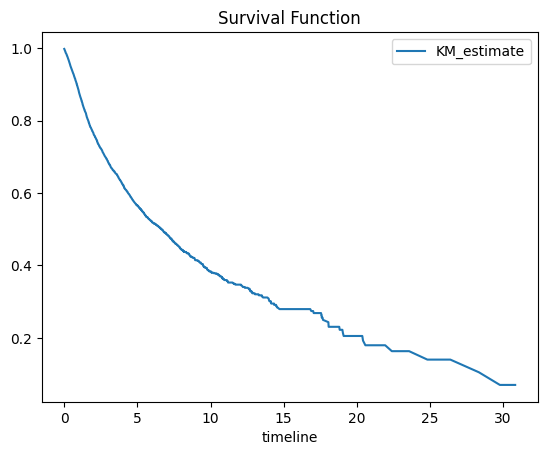

In [75]:
#survival probability without confidence interval
kmf.survival_function_.plot()
plt.title("Survival Function")

<AxesSubplot:xlabel='timeline'>

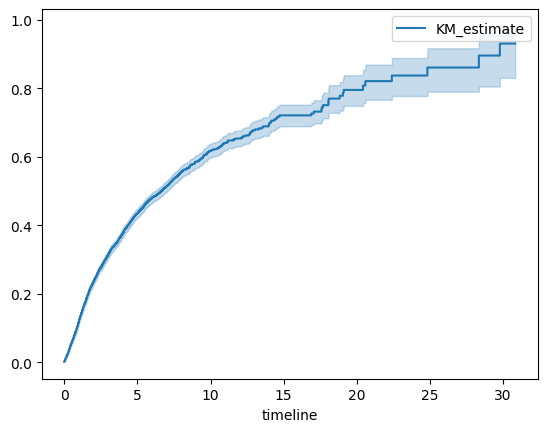

In [76]:
#probability of death
kmf.plot_cumulative_density()

In [77]:
#probability of 50% survival
kmf.median_survival_time_

6.632876712328767

In [78]:
kmf.event_table
#removed=observed+censored
#censored= Person that didnot die (they are of no use to us!)
#observed=Person that died.

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.000000,108,19,89,11094,11094
0.002740,6,1,5,0,10986
0.005479,9,4,5,0,10980
0.008219,19,3,16,0,10971
0.010959,13,1,12,0,10952
...,...,...,...,...,...
26.394521,1,0,1,0,5
28.345205,1,1,0,0,4
29.780822,1,1,0,0,3


In [79]:
kmf.survival_function_

,KM_estimate
timeline,
0.000000,0.998287
0.002740,0.998196
0.005479,0.997833
0.008219,0.997560
0.010959,0.997469
...,...
26.394521,0.139883
28.345205,0.104912
29.780822,0.069941


In [80]:
from lifelines.utils import median_survival_times
median=kmf.median_survival_time_
median_confidence_interval=median_survival_times(kmf.confidence_interval_)
print(median)
print(median_confidence_interval)

6.632876712328767
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                6.227397                7.041096


Text(0, 0.5, 'Survival probability')

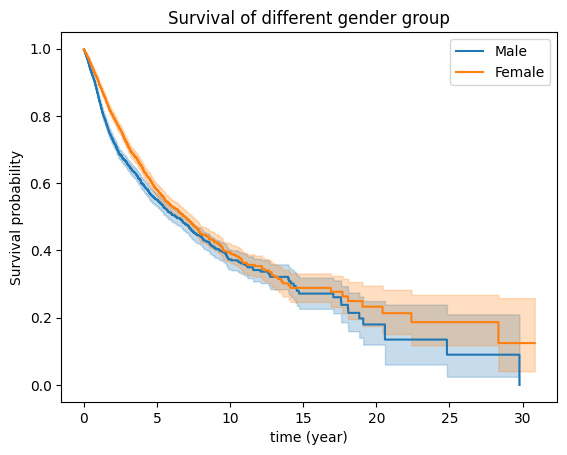

In [81]:
#survival probability of different gender group
ax = plt.subplot(111)

m=(df_final['gender']==1)

kmf.fit(year[m], event_observed=event[m],label="Male")
kmf.plot_survival_function(ax=ax)

kmf.fit(year[~m],event_observed=event[~m],label="Female")
kmf.plot_survival_function(ax=ax)

plt.title("Survival of different gender group")
plt.xlabel("time (year)")
plt.ylabel("Survival probability")


This is very clear that survival rate of female is always higher than male group in entire timeline.

In [82]:
#survival probability of different race
kmf_asn=KaplanMeierFitter()
kmf_wht=KaplanMeierFitter()
kmf_blck=KaplanMeierFitter()
kmf_ind=KaplanMeierFitter()
kmf_hwn=KaplanMeierFitter()


In [83]:
assian=(df_final['race']==1)
white=(df_final['race']==4)
black=(df_final['race']==2)
indian=(df_final['race']==0)
hawaiian=(df_final['race']==3)

Text(0, 0.5, 'Survival probability')

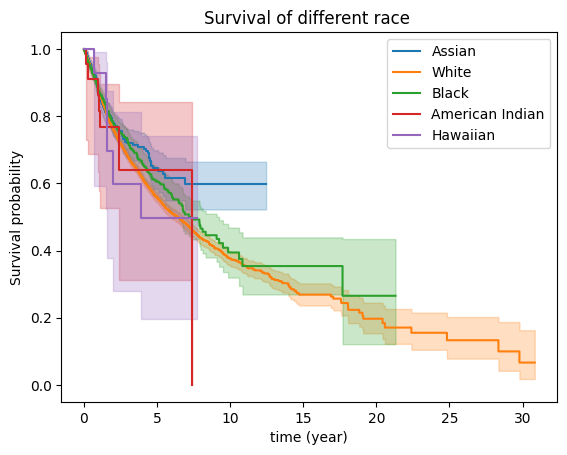

In [84]:
ax = plt.subplot(111)
kmf_asn.fit(year[assian], event_observed=event[assian],label="Assian")
kmf_asn.plot_survival_function(ax=ax)


kmf_wht.fit(year[white], event_observed=event[white],label="White")
kmf_wht.plot_survival_function(ax=ax)


kmf_blck.fit(year[black], event_observed=event[black],label="Black")
kmf_blck.plot_survival_function(ax=ax)

kmf_ind.fit(year[indian], event_observed=event[indian],label="American Indian")
kmf_ind.plot_survival_function(ax=ax)

kmf_hwn.fit(year[hawaiian], event_observed=event[hawaiian],label="Hawaiian")
kmf_hwn.plot_survival_function(ax=ax)

plt.title("Survival of different race ")
plt.xlabel("time (year)")
plt.ylabel("Survival probability")

From the above graph we can see that graph is not smooth, it creates step function over particular time duration

The reason behind this step function creation is because of limited sample over a given time duration

This is a major drawback of Kaplan Mier estimation.


In [85]:
df_final['age_at_initial_pathologic_diagnosis'].max()

79

In [86]:
df_final.isnull().sum()

type                                   0
age_at_initial_pathologic_diagnosis    0
gender                                 0
race                                   0
ajcc_pathologic_tumor_stage            0
vital_status                           0
Delay                                  0
dtype: int64

In [87]:
#creating class interval for diffenrt age group of size 20
df_final['age_bins'] = pd.cut(x=df_final['age_at_initial_pathologic_diagnosis'], bins=[0,20, 40, 60, 80])

C:\Users\awahi\AppData\Local\Temp\ipykernel_18188\1316426725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['age_bins'] = pd.cut(x=df_final['age_at_initial_pathologic_diagnosis'], bins=[0,20, 40, 60, 80])


In [88]:
df_final['age_bins'].value_counts()


(40, 60]    5094
(20, 40]    3170
(60, 80]    2074
(0, 20]      753
Name: age_bins, dtype: int64

In [89]:
df_final['age_bins'].unique()

[(60.0, 80.0], (40.0, 60.0], (20.0, 40.0], (0.0, 20.0], NaN]
Categories (4, interval[int64, right]): [(0, 20] < (20, 40] < (40, 60] < (60, 80]]

In [90]:
#coverting agebin into numerical number
df_final['age_bins'] = le.fit_transform(df_final['age_bins'])

C:\Users\awahi\AppData\Local\Temp\ipykernel_18188\2239527034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['age_bins'] = le.fit_transform(df_final['age_bins'])


In [91]:
df_final['age_bins'].value_counts()

2    5094
1    3170
3    2074
0     753
4       3
Name: age_bins, dtype: int64

Text(0, 0.5, 'Survival probability')

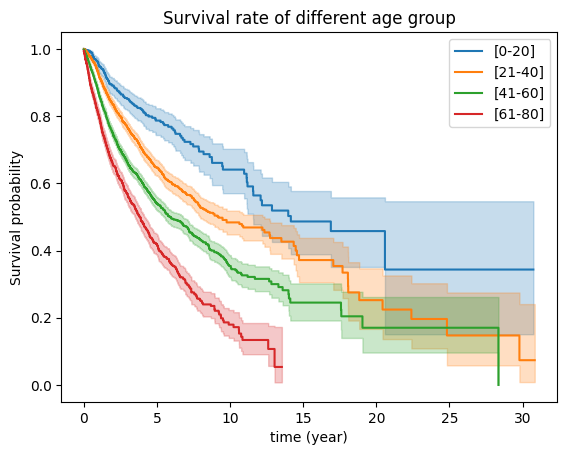

In [92]:
#survival probability of different age interval
ax = plt.subplot(111)

a=(df_final['age_bins']==0)
b=(df_final['age_bins']==1)
c=(df_final['age_bins']==2)
d=(df_final['age_bins']==3)

kmf.fit(year[a], event_observed=event[a],label="[0-20]")
kmf.plot_survival_function(ax=ax)

kmf.fit(year[b], event_observed=event[b],label="[21-40]")
kmf.plot_survival_function(ax=ax)

kmf.fit(year[c], event_observed=event[c],label="[41-60]")
kmf.plot_survival_function(ax=ax)

kmf.fit(year[d], event_observed=event[d],label="[61-80]")
kmf.plot_survival_function(ax=ax)



plt.title("Survival rate of different age group")
plt.xlabel("time (year)")
plt.ylabel("Survival probability")

From the above graph if we ignore the step function, we can see that age interval of [0-20] has highest survival probability where as age interval of [61-80] has lowest survival probability with time duration.

In [93]:
#logrank test
from lifelines.statistics import logrank_test

results = logrank_test(year[m], year[~m], event[m], event[~m], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          32.44 <0.005     26.28

In [94]:

results1 = logrank_test(year[a], year[b], event[a], event[b], alpha=.99)
results2=logrank_test(year[c], year[d], event[c], event[d], alpha=.99)
print(f"{results1.print_summary()},\t{results2.print_summary()}")


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          29.59 <0.005     24.16

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          99.59 <0.005     75.50

None,	None


In [95]:
df_final.drop('age_bins',axis=1,inplace=True)

c:\users\awahi\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [96]:
#Hazard Function:
from lifelines import NelsonAalenFitter
naf=NelsonAalenFitter()
naf.fit(durations=year,event_observed=event)

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 11094 total observations, 7501 right-censored observations>

<AxesSubplot:xlabel='timeline'>

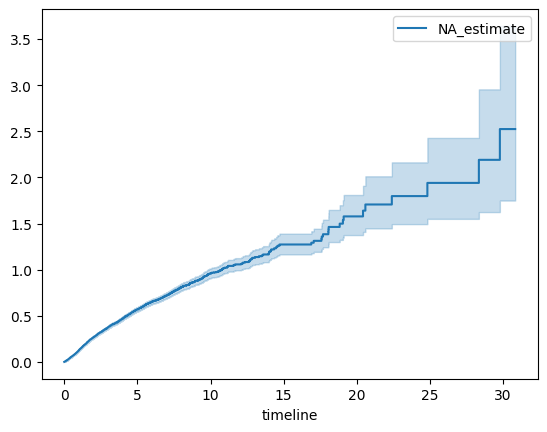

In [97]:
naf.plot_cumulative_hazard()

In [98]:
from lifelines import CoxPHFitter
cph=CoxPHFitter()
cph.fit(df_final,"Delay",event_col='vital_status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 11094 total observations, 7501 right-censored observations>
             duration col = 'Delay'
                event col = 'vital_status'
      baseline estimation = breslow
   number of observations = 11094
number of events observed = 3593
   partial log-likelihood = -29838.06
         time fit was run = 2022-10-21 07:14:05 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
type                                  0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
age_at_initial_pathologic_diagnosis   0.02       1.02       0.00             0.02             0.02                 1.02                 1.02
gender                                0.09       1.10       0.03             0.03             0.16                 1.03                 1.17
race                                  0.01       1.01       0.02            -0.03             0.05                 0.97                 1.05
ajcc_pathologic_tumor_stage           0.15       1.16       0.00             0.14             0.16                 1.15                 1.17

                                      cmp to     z      p   -log2(p)
covariate                                                           
type                                    0.00  0.39   0.70       0.52
age_at_initial_pathologic_diagnosis     0.00 16.92 <0.005     210.98
gender                                  0.00  2.74   0.01       7.36
race                                    0.00  0.62   0.53       0.91
ajcc_pathologic_tumor_stage             0.00 31.07 <0.005     701.63
---
Concordance = 0.71
Partial AIC = 59686.11
log-likelihood ratio test = 1458.21 on 5 df
-log2(p) of ll-ratio test = inf

<AxesSubplot:xlabel='log(HR) (95% CI)'>

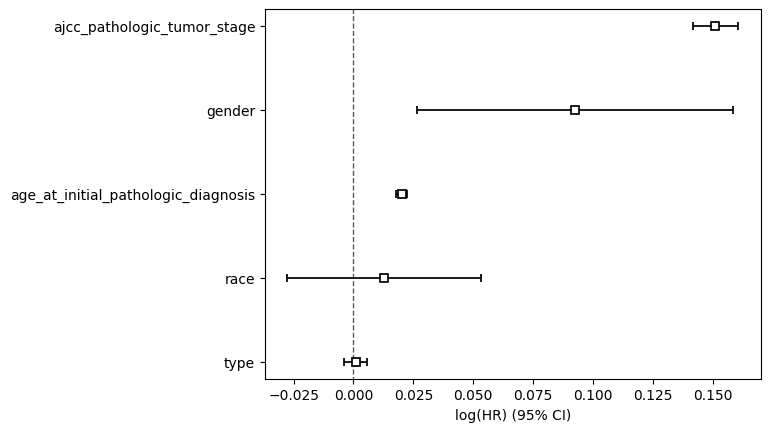

In [99]:
cph.plot()

<AxesSubplot:>

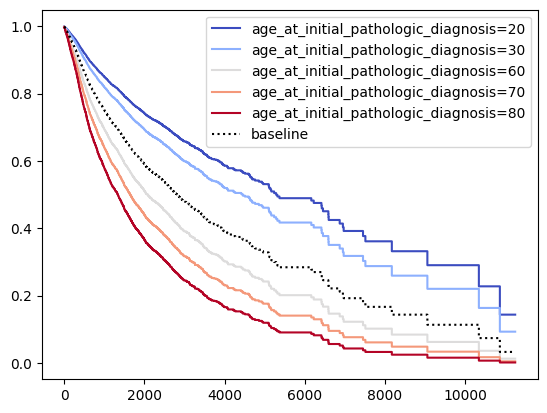

In [100]:
#survival probability of different age using CoxPHFitter 
cph.plot_partial_effects_on_outcome(covariates="age_at_initial_pathologic_diagnosis",values=[20,30,60,70,80],cmap='coolwarm')

<AxesSubplot:>

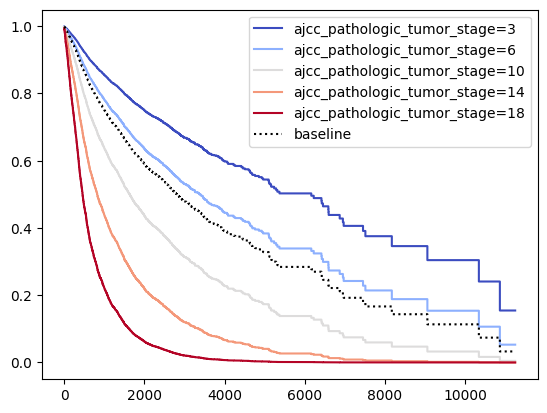

In [101]:
#survival probability of different tumor_stage using CoxPHFitter 
cph.plot_partial_effects_on_outcome(covariates="ajcc_pathologic_tumor_stage",values=[3,6,10,14,18],cmap='coolwarm')

Here the number indicates:
3=>Stage I,          6=>Stage II,        10=>Stage III,        14=>Stage IV,             18=>Stage X


# Modelling
### Our aim was to predict the survival rate with given data

In [102]:
#!pip install scikit-survival

In [103]:
year

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
11089    26.394521
11090    28.345205
11091    29.780822
11092    30.731507
11093    30.827397
Name: Delay, Length: 11094, dtype: float64

In [104]:
status=df_final['vital_status']

In [105]:
y=pd.concat([status,year],axis=1)


In [106]:
y.shape

(11094, 2)

In [107]:
y['vital_status']=y['vital_status'].astype('bool')

In [108]:
y

,vital_status,Delay
0,False,0.000000
1,False,0.000000
2,False,0.000000
3,False,0.000000
4,False,0.000000
...,...,...
11089,False,26.394521
11090,True,28.345205
11091,True,29.780822
11092,False,30.731507


In [109]:
y.tail()

,vital_status,Delay
11089,False,26.394521
11090,True,28.345205
11091,True,29.780822
11092,False,30.731507
11093,False,30.827397


In [110]:
#s1=pd.DataFrame.to_records(s[['vital_status','Delay']],index=False)
y1=pd.DataFrame.to_records(y[['vital_status','Delay']],index=False)
y1

rec.array([(False,  0.        ), (False,  0.        ),
           (False,  0.        ), ..., ( True, 29.78082192),
           (False, 30.73150685), (False, 30.82739726)],
          dtype=[('vital_status', '?'), ('Delay', '<f8')])

In [111]:
x=df_final.drop('vital_status',axis=1)
x1=x.drop('Delay',axis=1)

In [112]:
x1

,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage
0,1,74,1,1,6
1,2,55,0,1,12
2,2,69,0,1,7
3,2,56,0,1,8
4,2,55,0,1,7
...,...,...,...,...,...
11089,18,5,1,4,6
11090,16,45,0,4,8
11091,16,37,1,4,0
11092,22,9,0,4,5


In [113]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

estimator = CoxPHSurvivalAnalysis()
estimator.fit(x1,y1)

CoxPHSurvivalAnalysis()

In [114]:
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(x1)
result = concordance_index_censored(y1["vital_status"], y1["Delay"], prediction)
result[0]

0.7103583213645015

In [115]:
x_new = pd.DataFrame.from_dict({
    1: [1, 65, 0, 1, 6],
    2: [2, 75, 0, 4, 12],
    3: [6, 46, 1, 0, 7],
    4: [15, 40, 1, 0, 8]},
     columns=x1.columns, orient='index')
x_new

,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage
1,1,65,0,1,6
2,2,75,0,4,12
3,6,46,1,0,7
4,15,40,1,0,8


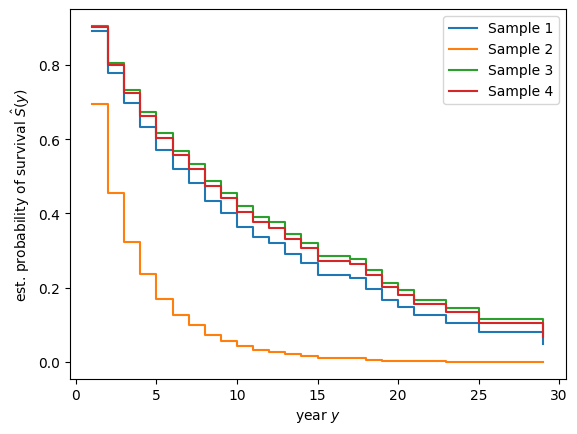

In [116]:
pred_surv = estimator.predict_survival_function(x_new)
time_points = np.arange(1, 30)
for i, surv_func in enumerate(pred_surv):
    plt.step(time_points, surv_func(time_points), where="post",
             label="Sample %d" % (i + 1))
plt.ylabel("est. probability of survival $\hat{S}(y)$")
plt.xlabel("year $y$")
plt.legend(loc="best")

## 